In [659]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import numpy as np

In [660]:
d = pd.read_csv(r"doubleExposureData.csv")

In [661]:
d

,x,lap,exposure,speed,c2,c3,c4,c5,c6,c8,...,c228,c229,c230,c231,c232,c233,c234,c235,c236,c237
0,184.972880,1,1,16.541870,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.054489,0,0,3.049441,0.000000,0.244201,0.163466,0.0,0.000000
1,184.282577,1,1,17.536543,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.244201,0,0,2.782045,0.000000,0.402620,0.244201,0.0,0.054489
2,181.440492,1,1,17.078299,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.402620,0,0,1.755799,0.000000,0.244201,0.402620,0.0,0.244201
3,173.073249,1,1,17.122441,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.244201,0,0,0.760846,0.000000,0.054489,0.244201,0.0,0.402620
4,169.263612,1,1,17.979428,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.054489,0,0,0.597380,0.000000,0.000000,0.054489,0.0,0.244201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,35.712371,33,2,27.385672,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1981,28.693152,33,2,26.771451,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.000000,0,0,0.000000,0.054489,0.000000,0.000000,0.0,0.000000
1982,27.570453,33,2,26.877737,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.000000,0,0,0.000000,0.244201,0.000000,0.000000,0.0,0.000000
1983,20.823957,33,2,26.196788,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.000000,0,0,0.000000,0.457109,0.000000,0.000000,0.0,0.000000


In [662]:
data = d.dropna()

allGoodCol = data.columns
allGoodCol = list(allGoodCol)
allGoodCol = allGoodCol[4::]

In [663]:
print("Size is ", len(allGoodCol))
print("Nb of lap of the 1st exposure is", len(data[data["exposure"] == 1]["lap"].unique()))
print("Nb of lap of the 2nd exposure is", len(data[data["exposure"] == 2]["lap"].unique()))

# We can reduce the number of laps in RUN2 to 16
# print("Cropping RUN2 to 16 laps")
# data = data[data['lap'] < len(data[data["exposure"] == 1]["lap"].unique()) + 16]
# print("Number of laps :", len(data["lap"].unique()))

# We reduce the number of lab in RUN2 to the same as in RUN1 to avoid any bias
print("Cropping RUN2 to RUN1 length")
data = data[data['lap'] < 2*len(data[data["exposure"] == 1]["lap"].unique()) + 1]

Size is  197
Nb of lap of the 1st exposure is 4
Nb of lap of the 2nd exposure is 29
Cropping RUN2 to RUN1 length


In [664]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData)
embedding.shape

(608, 3)

In [665]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap
df["speed"] = data.speed
df["exposure"] = data.exposure

In [666]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [667]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='exposure', opacity=0.9, color_continuous_scale='Bluered_r')

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Labeled UMAP by lap number

In [668]:
reducer_sup = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding_sup = reducer_sup.fit_transform(parsedData, y = data.lap)
embedding_sup.shape

(608, 3)

In [669]:
df2 = pd.DataFrame(embedding_sup, columns=['x1', 'x2', 'x3'])
df2["x"] = data.x
df2["lap"] = data.lap
df2["speed"] = data.speed
df2["exposure"] = data.exposure

In [670]:
# We generate a label for the data : the middle point of each lap have the lap number

global_label = ["" for i in range(0, len(df))]

for lap in df2.lap.unique():

    # We get the number of elements in the lap
    nb = len(df2[df2.lap == lap])

    # We get the index of the first point of the global df with that lap
    start = len(df2[df2.lap < lap])

    # We get the middle point
    middle = int(nb/2)

    # We get the coordinates of the middle point in the global dataframe
    middle = start + middle

    # We set the label
    global_label[middle] = str(lap)

df2["label"] = global_label

In [671]:
df2

,x1,x2,x3,x,lap,speed,exposure,label
0,10.199352,6.160612,-5.781135,184.972880,1,16.541870,1,
1,10.207841,6.170679,-5.777330,184.282577,1,17.536543,1,
2,10.221900,6.127869,-5.785275,181.440492,1,17.078299,1,
3,10.156383,6.203817,-5.741223,173.073249,1,17.122441,1,
4,10.181924,6.179228,-5.745726,169.263612,1,17.979428,1,
...,...,...,...,...,...,...,...,...
603,15.377916,-8.170866,-6.463412,30.920066,8,7.909540,2,
604,15.380289,-8.167574,-6.471110,32.234498,8,7.686507,2,
605,15.417953,-8.209593,-6.444141,32.540395,8,7.070613,2,
606,15.401222,-8.160120,-6.455039,32.285745,8,6.274923,2,


In [672]:
fig = px.scatter_3d(df2, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9, text = "label")

fig.update_traces(marker_size=1.5)
fig.update_traces(textfont_size=10)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Replay projection in there

In [673]:
# Load the replay data - MAKE SURE IT'S THE SAME ANIMAL !

dRep = pd.read_csv(r"replayData.csv")
dataRep = dRep.dropna()
allGoodColRep = dataRep.columns
allGoodColRep = list(allGoodColRep)
allGoodColRep = allGoodColRep[3::]

In [674]:
dRep

,binEdges,id,order,c2,c3,c4,c5,c6,c8,c9,...,c228,c229,c230,c231,c232,c233,c234,c235,c236,c237
0,6408.795644,50,0.166667,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
1,6408.815644,50,0.333333,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
2,6408.835644,50,0.500000,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
3,6408.855644,50,0.666667,0,0.000000,0,0,0.0,0.957912,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.957912,0.0,0.0
4,6408.875644,50,0.833333,0,0.000000,0,0,0.0,0.042088,0,...,0.957912,0.000000,0,0,0.0,0.0,0.0,0.042088,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,13902.995644,197,0.428571,0,0.042088,0,0,0.0,0.000000,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
521,13903.015644,197,0.571429,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
522,13903.035644,197,0.714286,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.957912,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
523,13903.055644,197,0.857143,0,0.000000,0,0,0.0,0.000000,0,...,0.000000,0.042088,0,0,0.0,0.0,0.0,0.000000,0.0,0.0


In [675]:
parsedDataRep = dataRep[allGoodCol].values
embeddingRep = reducer.transform(parsedDataRep)

embeddingRepTrial = reducer_sup.transform(parsedDataRep)


In [676]:
dfRep = pd.DataFrame(embeddingRep, columns=['x1', 'x2', 'x3'])
dfRep["t"] = dRep["binEdges"]
dfRep["order"] = dRep["order"]

dfRep2 = pd.DataFrame(embeddingRepTrial, columns=['x1', 'x2', 'x3'])
dfRep2["t"] = dRep["binEdges"]
dfRep2["order"] = dRep["order"]

In [677]:
import plotly.graph_objects as go

In [678]:
fig = go.Figure(data=[go.Scatter3d(x=df["x1"], y=df["x2"], z = df["x3"], mode='markers')])

fig.add_trace(go.Scatter3d(x=dfRep["x1"], y=dfRep["x2"], z=dfRep["x3"], mode='markers'))
fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### We project on the trial manifold

In [679]:
fig = go.Figure(data=[go.Scatter3d(x=df2["x1"], y=df2["x2"], z = df2["x3"], mode='markers')])

fig.add_trace(go.Scatter3d(x=dfRep2["x1"], y=dfRep2["x2"], z=dfRep2["x3"], mode='markers'))
fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### We look for the events closer to the re-exposure manifold than to the exposure

In [680]:
from scipy.spatial import distance

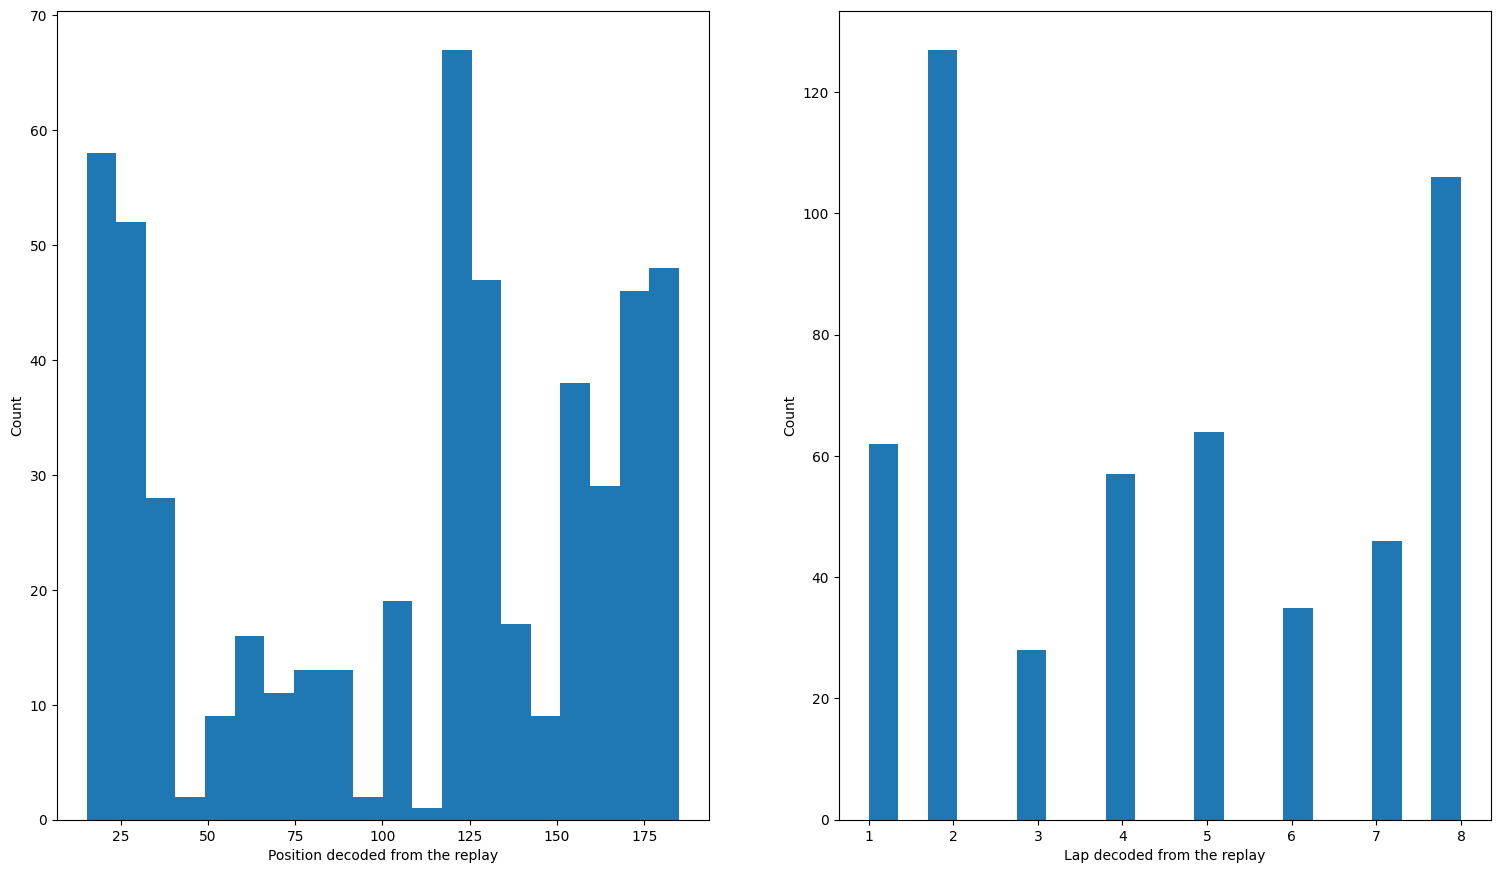

In [681]:
# For each point in the replay, we want to find the closest point in the original data - exposure == 2

distMat = distance.cdist(embeddingRep, embedding, 'euclidean')

# We find the index of the minimum on each line
minIndex = np.argmin(distMat, axis = 1)

# Now we retrieve the position of the closest point
x = df["x"].values
x = x[minIndex]

plt.subplot(1, 2, 1)
plt.hist(x, 20)
plt.xlabel("Position decoded from the replay")
plt.ylabel("Count")


# We retrieve the lap of the closest point
exposure = df["exposure"].values
exposure = exposure[minIndex]

lap = df["lap"].values
lap = lap[minIndex]

plt.subplot(1, 2, 2)
plt.hist(lap, 20)
plt.xlabel("Lap decoded from the replay")
plt.ylabel("Count")

# Increase the width of the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Text(0, 0.5, 'Count')

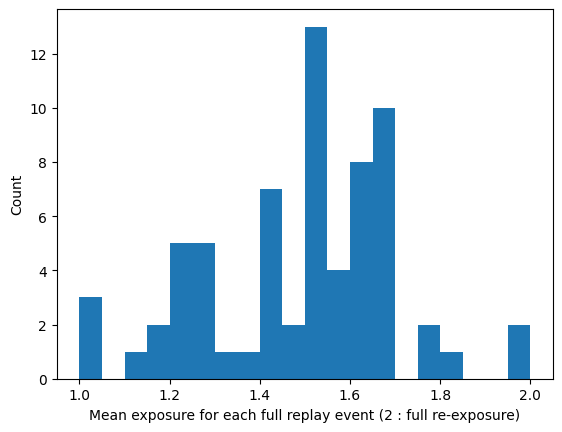

In [682]:
# We get the quantity of replay IDs that are full exposure 2, mixed, full exposure 1

uniqueID = np.unique(dRep["id"])
allMeans = [np.mean(exposure[dRep["id"] == i]) for i in uniqueID]

plt.hist(allMeans, 20)
plt.xlabel("Mean exposure for each full replay event (2 : full re-exposure)")
plt.ylabel("Count")


### We look at the lap to lap correlation between the trajectories